In [143]:
import re
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib, matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KernelDensity

from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import ExtraTreesRegressor as ETR

# from xgboost.sklearn import XGBClassifier as XGBC

# from bayes_opt import BayesianOptimization
import scipy
from scipy import stats
import statsmodels.api as sm

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA, MiniBatchSparsePCA
from sklearn.manifold import TSNE
import sweetviz as sv
from sklearn.decomposition import KernelPCA

In [2]:
df = pd.read_csv("CHES2019_experts.csv")

In [50]:
df.head(20)

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,2007,3.0,6.0,4.0,NaN,3,NaN,5.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,2005,5.0,6.0,2.0,NaN,4,NaN,5.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,2018,7.0,10.0,0.0,NaN,9,NaN,0.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,2008,7.0,10.0,0.0,NaN,9,NaN,0.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,2019,6.0,9.0,1.0,NaN,5,NaN,5.0,...,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.columns

Index(['id', 'party', 'party_id', 'position', 'eu_salience', 'eu_dissent',
       'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent', 'lrecon_salience',
       'galtan', 'galtan_blur', 'galtan_dissent', 'galtan_salience', 'lrgen',
       'immigrate_policy', 'immigra_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'multicult_dissent',
       'redistribution', 'redist_salience', 'environment', 'enviro_salience',
       'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
       'sociallifestyle', 'religious_principles', 'ethnic_minorities',
       'nationalism', 'urban_rural', 'protectionism', 'regions',
       'russian_interference', 'anti_islam_rhetoric', 'people_vs_elite',
       'antielite_salience', 'corrupt_salience', 'members_vs_leadership',
       'eu_cohesion', 'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum',
       'party_a_econ', 'party_b_econ', 'party_c_econ', 'gender', 'dob',
       'lrecon_self', 'galtan_self', 'eu_positi

In [49]:
df.describe()

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon_dissent,lrecon_salience,galtan_blur,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
count,3823.000000,3823.000000,3823.000000,3561.000000,3523.000000,1499.000000,1802.000000,1520.000000,3523.000000,1642.000000,...,3814.000000,3674.000000,3797.000000,3799.000000,1989.000000,1989.000000,1989.000000,36.000000,43.000000,38.000000
mean,8.643735,5.353387,1864.380068,4.971637,6.085722,2.625751,3.146504,2.960526,6.355095,2.783800,...,1.710016,1972.347033,4.918093,3.326402,0.772500,1.028167,1.420311,4.916667,4.186047,4.552632
std,5.668377,3.102622,1100.263807,1.933308,2.457828,2.217037,2.596855,2.136185,2.253446,2.422755,...,0.477470,12.658841,1.885663,1.808154,0.347610,0.488534,0.607744,1.401530,2.442245,2.344601
min,1.000000,1.000000,102.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1933.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,837.000000,3.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1963.000000,4.000000,2.000000,0.534522,0.690066,0.997249,4.000000,2.000000,2.250000
50%,8.000000,5.000000,2101.000000,6.000000,6.000000,2.000000,3.000000,2.000000,7.000000,2.000000,...,2.000000,1975.000000,5.000000,3.000000,0.707107,0.900337,1.264911,5.000000,5.000000,5.000000
75%,12.000000,8.000000,2804.000000,7.000000,8.000000,4.000000,5.000000,4.000000,8.000000,4.000000,...,2.000000,1982.000000,6.000000,4.000000,0.971825,1.193416,1.772104,6.000000,7.000000,7.000000
max,27.000000,14.000000,4508.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,3.000000,1995.000000,11.000000,11.000000,2.121320,3.535534,3.681518,7.000000,7.000000,7.000000


In [5]:
# dropping >95% missing data columns
df.drop(columns = ["eu_econ_require", "eu_political_require", "eu_googov_require"])

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,...,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5,NaN,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
1,1,2,BSP,2003,5.0,6.0,4.0,NaN,3,NaN,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
2,1,3,DPS,2004,7.0,9.0,2.0,NaN,5,NaN,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
3,1,4,Volya,2017,3.0,6.0,4.0,NaN,7,NaN,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
4,1,5,NFSB,2014,3.0,6.0,4.0,NaN,7,NaN,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,BREXIT,1110,1.0,8.0,NaN,1.0,.d,NaN,...,9,5.0,2.0,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928
3819,4,8,BREXIT,1110,1.0,10.0,0.0,NaN,8,1,...,10,7.0,2.0,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928
3820,11,8,BREXIT,1110,NaN,NaN,NaN,NaN,.d,.d,...,9,5.0,1.0,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928
3821,16,8,BREXIT,1110,2.0,5.0,NaN,3.0,8,.d,...,8,5.0,1.0,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928


In [71]:
target = df["party_id"]
target.value_counts()

2101    27
2103    27
2109    27
2111    27
2115    27
        ..
4004     2
3802     2
3804     2
3806     2
4009     2
Name: party_id, Length: 277, dtype: int64

In [8]:
#dropping categorical cols
df.drop(columns="party_name", inplace=True)
df

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,...,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,1110,1.0,8.0,NaN,1.0,.d,NaN,NaN,...,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN
3819,4,8,1110,1.0,10.0,0.0,NaN,8,1,NaN,...,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN
3820,11,8,1110,NaN,NaN,NaN,NaN,.d,.d,NaN,...,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN
3821,16,8,1110,2.0,5.0,NaN,3.0,8,.d,NaN,...,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN


In [14]:
df["lrecon_blur"].replace(".d", method = "bfill",inplace=True)
df["lrecon_blur"].value_counts()

2     271
3     255
1     253
4     217
0     191
5     183
6     151
7     144
8      90
10     29
9      29
Name: lrecon_blur, dtype: int64

In [23]:
df.cname.value_counts()

esp    195
ger    189
net    169
ita    152
den    140
swe    136
uk     136
bel    132
fin    112
nor     90
swi     88
gre     72
fra     72
por     64
ire     63
aus     50
tur     45
ice     40
cyp     16
mal     14
lux     14
Name: cname, dtype: int64

In [18]:
df["lrecon"].replace(".d", method = "bfill",inplace=True)
df["lrecon"].value_counts()

5     523
4     477
7     472
3     444
6     434
8     385
2     357
1     211
9     172
0      97
10     76
Name: lrecon, dtype: int64

In [21]:
df.replace(".d", method = "bfill",inplace=True)
df

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,...,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,1110,1.0,8.0,NaN,1.0,8,NaN,NaN,...,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN
3819,4,8,1110,1.0,10.0,0.0,NaN,8,1,NaN,...,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN
3820,11,8,1110,NaN,NaN,NaN,NaN,8,NaN,NaN,...,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN
3821,16,8,1110,2.0,5.0,NaN,3.0,8,NaN,NaN,...,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928,NaN,NaN,NaN


In [24]:
categorical_df = df.select_dtypes(include=["object"])

In [26]:
categorical_df.columns

Index(['lrecon', 'lrecon_blur', 'galtan', 'anti_islam_rhetoric',
       'party_b_econ', 'cname'],
      dtype='object')

In [32]:
df.drop(columns="cname", inplace=True)

In [6]:
#imputing missing values using kNN
imputer = KNNImputer(n_neighbors=5, weights="uniform")

In [33]:
f_imptd = imputer.fit_transform(np.array(df))
f_imptd

array([[1.000e+00, 1.000e+00, 2.010e+03, ..., 5.000e+00, 1.800e+00,
        1.800e+00],
       [1.000e+00, 2.000e+00, 2.003e+03, ..., 5.000e+00, 1.800e+00,
        1.800e+00],
       [1.000e+00, 3.000e+00, 2.004e+03, ..., 5.000e+00, 1.800e+00,
        1.800e+00],
       ...,
       [1.100e+01, 8.000e+00, 1.110e+03, ..., 5.000e+00, 1.800e+00,
        1.800e+00],
       [1.600e+01, 8.000e+00, 1.110e+03, ..., 5.000e+00, 1.600e+00,
        1.800e+00],
       [3.000e+00, 8.000e+00, 1.110e+03, ..., 5.000e+00, 1.800e+00,
        1.800e+00]])

In [34]:
df_new = pd.DataFrame(f_imptd, columns = df.columns)

In [35]:
df_new

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1.0,1.0,2010.0,7.0,9.0,1.0,3.6,5.0,6.2,1.0,...,1.0,1948.0,9.0,3.0,0.922645,1.242164,1.511485,5.0,1.8,1.8
1,1.0,2.0,2003.0,5.0,6.0,4.0,5.8,3.0,7.6,5.0,...,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085,5.0,1.8,1.8
2,1.0,3.0,2004.0,7.0,9.0,2.0,3.6,5.0,7.6,1.0,...,1.0,1948.0,9.0,3.0,0.922645,1.242164,1.511485,5.0,1.8,1.8
3,1.0,4.0,2017.0,3.0,6.0,4.0,3.4,7.0,6.2,5.0,...,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085,5.0,1.8,1.8
4,1.0,5.0,2014.0,3.0,6.0,4.0,4.6,7.0,6.8,5.0,...,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085,5.0,1.8,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17.0,8.0,1110.0,1.0,8.0,0.4,1.0,8.0,5.4,4.6,...,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928,5.0,1.6,1.6
3819,4.0,8.0,1110.0,1.0,10.0,0.0,2.4,8.0,1.0,4.8,...,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928,4.8,1.6,1.6
3820,11.0,8.0,1110.0,2.0,9.0,0.8,1.4,8.0,4.4,1.4,...,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928,5.0,1.8,1.8
3821,16.0,8.0,1110.0,2.0,5.0,0.4,3.0,8.0,5.6,3.6,...,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928,5.0,1.6,1.8


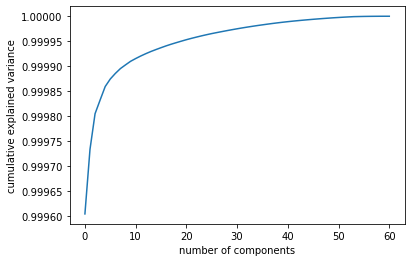

In [37]:
pca = PCA().fit(df_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [38]:
le = preprocessing.LabelEncoder()

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3823 non-null   float64
 1   party                  3823 non-null   float64
 2   party_id               3823 non-null   float64
 3   position               3823 non-null   float64
 4   eu_salience            3823 non-null   float64
 5   eu_dissent             3823 non-null   float64
 6   eu_blur                3823 non-null   float64
 7   lrecon                 3823 non-null   float64
 8   lrecon_blur            3823 non-null   float64
 9   lrecon_dissent         3823 non-null   float64
 10  lrecon_salience        3823 non-null   float64
 11  galtan                 3823 non-null   float64
 12  galtan_blur            3823 non-null   float64
 13  galtan_dissent         3823 non-null   float64
 14  galtan_salience        3823 non-null   float64
 15  lrge

In [53]:
#dropping id as it doesnt contribute much
df_new.drop(columns="id", inplace=True)
df_new

,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1.0,2010.0,7.0,9.0,1.0,3.6,5.0,6.2,1.0,10.0,...,1.0,1948.0,9.0,3.0,0.922645,1.242164,1.511485,5.0,1.8,1.8
1,2.0,2003.0,5.0,6.0,4.0,5.8,3.0,7.6,5.0,7.0,...,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085,5.0,1.8,1.8
2,3.0,2004.0,7.0,9.0,2.0,3.6,5.0,7.6,1.0,9.0,...,1.0,1948.0,9.0,3.0,0.922645,1.242164,1.511485,5.0,1.8,1.8
3,4.0,2017.0,3.0,6.0,4.0,3.4,7.0,6.2,5.0,9.0,...,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085,5.0,1.8,1.8
4,5.0,2014.0,3.0,6.0,4.0,4.6,7.0,6.8,5.0,5.0,...,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085,5.0,1.8,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,8.0,1110.0,1.0,8.0,0.4,1.0,8.0,5.4,4.6,3.4,...,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928,5.0,1.6,1.6
3819,8.0,1110.0,1.0,10.0,0.0,2.4,8.0,1.0,4.8,5.0,...,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928,4.8,1.6,1.6
3820,8.0,1110.0,2.0,9.0,0.8,1.4,8.0,4.4,1.4,1.2,...,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928,5.0,1.8,1.8
3821,8.0,1110.0,2.0,5.0,0.4,3.0,8.0,5.6,3.6,2.2,...,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928,5.0,1.6,1.8


In [78]:
df_new.drop(columns=["eu_econ_require", "eu_political_require", "eu_googov_require"])

,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,...,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd
0,1.0,2010.0,7.0,9.0,1.0,3.6,5.0,6.2,1.0,10.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.922645,1.242164,1.511485
1,2.0,2003.0,5.0,6.0,4.0,5.8,3.0,7.6,5.0,7.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085
2,3.0,2004.0,7.0,9.0,2.0,3.6,5.0,7.6,1.0,9.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.922645,1.242164,1.511485
3,4.0,2017.0,3.0,6.0,4.0,3.4,7.0,6.2,5.0,9.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085
4,5.0,2014.0,3.0,6.0,4.0,4.6,7.0,6.8,5.0,5.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,0.866631,1.467213,1.471085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,8.0,1110.0,1.0,8.0,0.4,1.0,8.0,5.4,4.6,3.4,...,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,1.087811,1.964971,1.192928
3819,8.0,1110.0,1.0,10.0,0.0,2.4,8.0,1.0,4.8,5.0,...,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,1.087811,1.964971,1.192928
3820,8.0,1110.0,2.0,9.0,0.8,1.4,8.0,4.4,1.4,1.2,...,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,1.087811,1.964971,1.192928
3821,8.0,1110.0,2.0,5.0,0.4,3.0,8.0,5.6,3.6,2.2,...,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,1.087811,1.964971,1.192928


In [44]:
cname = categorical_df["cname"]
cname

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3818     uk
3819     uk
3820     uk
3821     uk
3822     uk
Name: cname, Length: 3823, dtype: object

In [45]:
cname.fillna(method = "ffill",inplace=True)
cname

/Users/stuti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3818     uk
3819     uk
3820     uk
3821     uk
3822     uk
Name: cname, Length: 3823, dtype: object

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()

In [57]:
len(df_new.columns)

60

In [79]:
X_train_minmax = min_max_scaler.fit_transform(df_new)

In [80]:
df_nrm = pd.DataFrame(X_train_minmax, columns=df_new.columns)
df_nrm

,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,0.000000,0.433046,1.000000,0.9,0.10,0.36,0.5,0.62,0.10,1.00,...,0.0,0.241935,0.8,0.2,0.434939,0.351337,0.410560,0.666667,0.133333,0.133333
1,0.076923,0.431457,0.666667,0.6,0.40,0.58,0.3,0.76,0.50,0.70,...,0.0,0.241935,0.8,0.2,0.408534,0.414991,0.399587,0.666667,0.133333,0.133333
2,0.153846,0.431684,1.000000,0.9,0.20,0.36,0.5,0.76,0.10,0.90,...,0.0,0.241935,0.8,0.2,0.434939,0.351337,0.410560,0.666667,0.133333,0.133333
3,0.230769,0.434635,0.333333,0.6,0.40,0.34,0.7,0.62,0.50,0.90,...,0.0,0.241935,0.8,0.2,0.408534,0.414991,0.399587,0.666667,0.133333,0.133333
4,0.307692,0.433954,0.333333,0.6,0.40,0.46,0.7,0.68,0.50,0.50,...,0.0,0.241935,0.8,0.2,0.408534,0.414991,0.399587,0.666667,0.133333,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0.538462,0.228779,0.000000,0.8,0.04,0.10,0.8,0.54,0.46,0.34,...,0.5,0.693548,0.4,0.2,0.512799,0.555778,0.324032,0.666667,0.100000,0.100000
3819,0.538462,0.228779,0.000000,1.0,0.00,0.24,0.8,0.10,0.48,0.50,...,0.5,0.419355,0.5,0.2,0.512799,0.555778,0.324032,0.633333,0.100000,0.100000
3820,0.538462,0.228779,0.166667,0.9,0.08,0.14,0.8,0.44,0.14,0.12,...,0.0,0.919355,0.2,0.1,0.512799,0.555778,0.324032,0.666667,0.133333,0.133333
3821,0.538462,0.228779,0.166667,0.5,0.04,0.30,0.8,0.56,0.36,0.22,...,0.0,0.709677,0.4,0.2,0.512799,0.555778,0.324032,0.666667,0.100000,0.133333


In [81]:
pca_norm = PCA().fit(df_nrm)

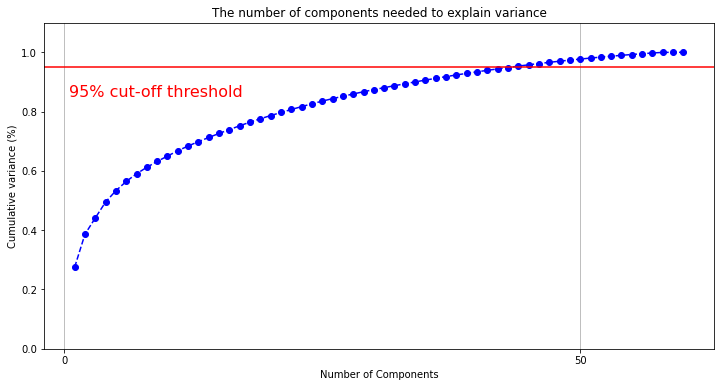

In [82]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 61, step=1) # Play with these values the 1000 
y = np.cumsum(pca_norm.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 60, step=50)) #Enter your total column number
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [83]:
#trying pca for 40, 45, 50 components
pca_40 = PCA(n_components=40)

In [84]:
df_trns = pca_40.fit_transform(df_nrm)

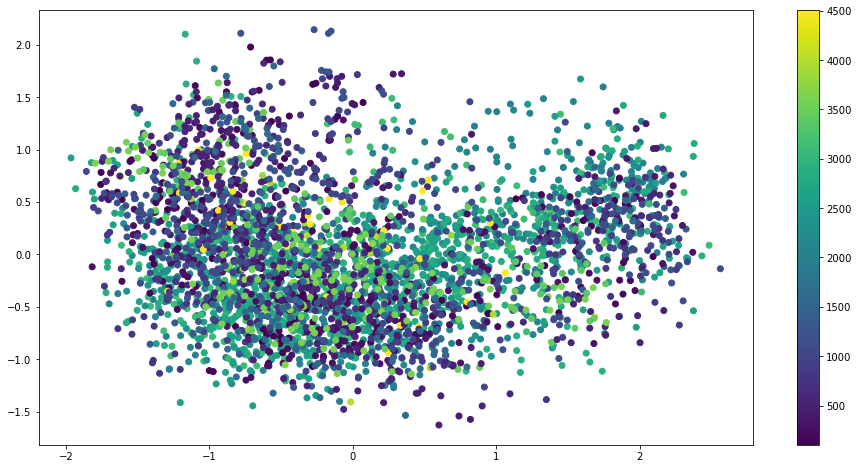

In [85]:
plt.figure(figsize = (16,8))
plt.scatter(df_trns[:, 0], df_trns[:, 1], c = target)
plt.colorbar()

In [95]:
pca_50 = PCA(n_components=50)
df_50 = pca_50.fit_transform(df_nrm)

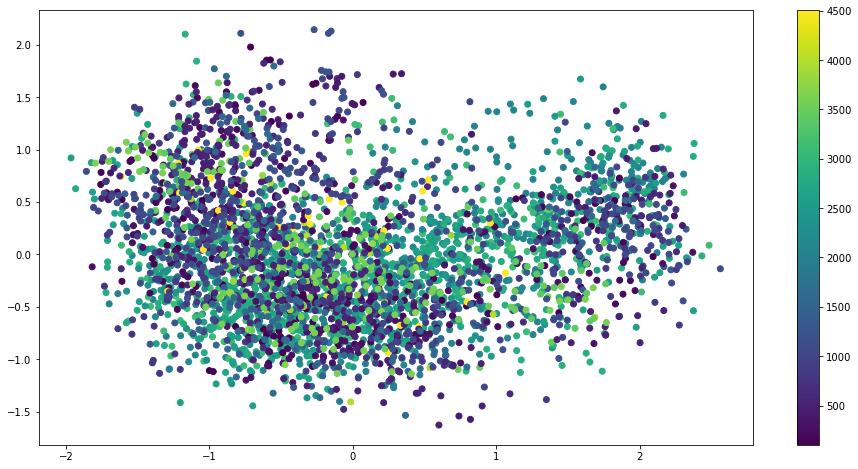

In [96]:
plt.figure(figsize = (16,8))
plt.scatter(df_50[:, 0], df_50[:, 1], c = target)
plt.colorbar()

In [77]:
# Feature ranking:
# (1, 'galtan_sd', 0.0726804467340246)
# (2, 'lrecon_sd', 0.07219482482231694)
# (3, 'eu_position_sd', 0.06940048972895829)
# (4, 'regions', 0.02439542383055813)
# (5, 'lrgen', 0.022780840251347002)
# (6, 'religious_principles', 0.021911204822747853)
# (7, 'corrupt_salience', 0.021908408301509995)
# (8, 'urban_rural', 0.021156329636647576)
# (9, 'enviro_salience', 0.01936934537842865)
# (10, 'people_vs_elite', 0.019089147010762114)
# (11, 'econ_interven', 0.018986711602555096)
# (12, 'spendvtax', 0.01884031233386642)
# (13, 'galtan_dissent', 0.018717041679848088)
# (14, 'position', 0.018312978568030085)
# (15, 'russian_interference', 0.018287378592297614)
# (16, 'eu_dissent', 0.01815512361950666)
# (17, 'ethnic_minorities', 0.018104201832846775)
# (18, 'eu_salience', 0.018093895386288215)
# (19, 'members_vs_leadership', 0.01792792341107031)
# (20, 'lrecon_dissent', 0.017904303094582994)
# (21, 'antielite_salience', 0.017846194757881698)
# (22, 'deregulation', 0.017744005290770085)
# (23, 'environment', 0.01774041350256306)
# (24, 'protectionism', 0.01752455460981324)
# (25, 'lrecon_salience', 0.01747819987556844)
# (26, 'redistribution', 0.01741286397913322)
# (27, 'sociallifestyle', 0.017314681543238997)
# (28, 'galtan_blur', 0.017112854557590845)
# (29, 'eu_blur', 0.016985050712527153)
# (30, 'eu_budgets', 0.016753031336459355)

feat_col_imp = ["galtan_sd", "lrecon_sd", 'eu_position_sd', "regions", "lrgen", 'religious_principles'
                ,'corrupt_salience', 'urban_rural', 'enviro_salience', 'people_vs_elite', 'econ_interven',
               'spendvtax', 'galtan_dissent', 'position', 'russian_interference', 'eu_dissent', 'ethnic_minorities',
               'eu_salience', 'members_vs_leadership', 'lrecon_dissent', 'antielite_salience', 'deregulation', 
                'environment', 'protectionism', 'lrecon_salience', 'redistribution', 'sociallifestyle', 'galtan_blur',
               'eu_blur', 'eu_budgets']

In [88]:
df_new_feat = df_new.drop(columns=feat_col_imp)

In [91]:
df_new_feat.drop(columns=["party", "party_id"],inplace=True)

In [92]:
df_new_feat

,lrecon,lrecon_blur,galtan,galtan_salience,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,...,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_econ_require,eu_political_require,eu_googov_require
0,5.0,6.2,6.0,5.0,7.0,5.0,1.0,5.0,5.0,1.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,5.0,1.8,1.8
1,3.0,7.6,9.0,8.0,5.0,5.0,5.0,5.0,7.0,5.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,5.0,1.8,1.8
2,5.0,7.6,5.0,8.0,3.0,5.0,1.0,5.0,8.0,1.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,5.0,1.8,1.8
3,7.0,6.2,9.0,8.0,6.0,5.0,1.0,5.0,8.0,1.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,5.0,1.8,1.8
4,7.0,6.8,9.0,8.0,10.0,10.0,1.0,5.0,8.0,1.0,...,3.0,9.0,6.0,1.0,1948.0,9.0,3.0,5.0,1.8,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,8.0,5.4,8.0,6.0,8.0,8.4,1.0,9.0,7.2,1.8,...,3.0,9.0,5.0,2.0,1976.0,5.0,3.0,5.0,1.6,1.6
3819,8.0,1.0,6.2,4.6,8.0,3.0,2.0,6.0,5.6,2.6,...,2.0,10.0,7.0,2.0,1959.0,6.0,3.0,4.8,1.6,1.6
3820,8.0,4.4,8.2,6.8,6.4,7.4,0.8,5.0,5.4,1.0,...,3.0,9.0,5.0,1.0,1990.0,3.0,2.0,5.0,1.8,1.8
3821,8.0,5.6,10.0,7.0,9.2,8.4,1.2,9.0,7.4,1.6,...,3.0,8.0,5.0,1.0,1977.0,5.0,3.0,5.0,1.6,1.8


In [93]:
X_train_minmax = min_max_scaler.fit_transform(df_new_feat)

In [94]:
df_scaled_new = pd.DataFrame(X_train_minmax, columns=df_new_feat.columns)
df_scaled_new

,lrecon,lrecon_blur,galtan,galtan_salience,immigrate_policy,immigra_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,...,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,eu_econ_require,eu_political_require,eu_googov_require
0,0.5,0.62,0.60,0.50,0.70,0.50,0.10,0.50,0.50,0.10,...,0.4,0.6,0.500,0.0,0.241935,0.8,0.2,0.666667,0.133333,0.133333
1,0.3,0.76,0.90,0.80,0.50,0.50,0.50,0.50,0.70,0.50,...,0.4,0.6,0.500,0.0,0.241935,0.8,0.2,0.666667,0.133333,0.133333
2,0.5,0.76,0.50,0.80,0.30,0.50,0.10,0.50,0.80,0.10,...,0.4,0.6,0.500,0.0,0.241935,0.8,0.2,0.666667,0.133333,0.133333
3,0.7,0.62,0.90,0.80,0.60,0.50,0.10,0.50,0.80,0.10,...,0.4,0.6,0.500,0.0,0.241935,0.8,0.2,0.666667,0.133333,0.133333
4,0.7,0.68,0.90,0.80,1.00,1.00,0.10,0.50,0.80,0.10,...,0.4,0.6,0.500,0.0,0.241935,0.8,0.2,0.666667,0.133333,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0.8,0.54,0.80,0.60,0.80,0.84,0.10,0.90,0.72,0.18,...,0.4,0.6,0.375,0.5,0.693548,0.4,0.2,0.666667,0.100000,0.100000
3819,0.8,0.10,0.62,0.46,0.80,0.30,0.20,0.60,0.56,0.26,...,0.2,0.8,0.625,0.5,0.419355,0.5,0.2,0.633333,0.100000,0.100000
3820,0.8,0.44,0.82,0.68,0.64,0.74,0.08,0.50,0.54,0.10,...,0.4,0.6,0.375,0.0,0.919355,0.2,0.1,0.666667,0.133333,0.133333
3821,0.8,0.56,1.00,0.70,0.92,0.84,0.12,0.90,0.74,0.16,...,0.4,0.4,0.375,0.0,0.709677,0.4,0.2,0.666667,0.100000,0.133333


In [98]:
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_scaled_new)

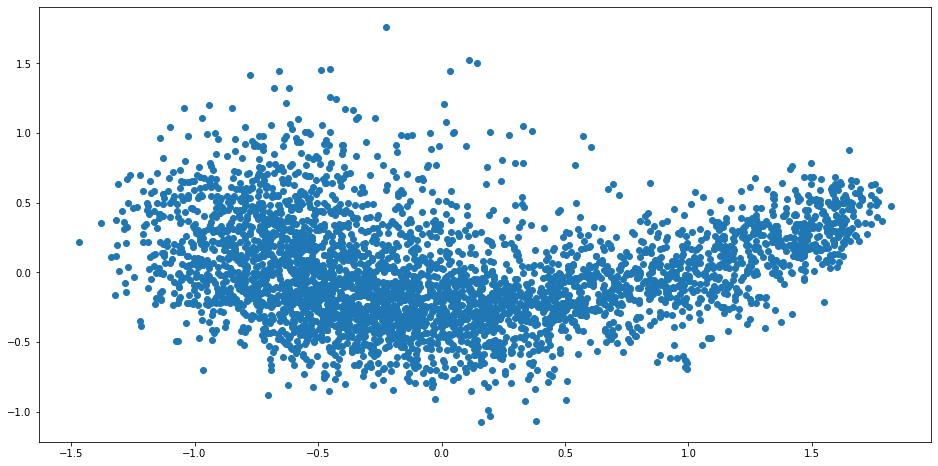

In [105]:
plt.figure(figsize = (16,8))
plt.scatter(df_pca_2[:, 0], df_pca_2[:, 1]) #c = target)


In [101]:
target.unique()

array([2010, 2003, 2004, 2017, 2014, 2007, 2005, 2018, 2008, 2019, 3101,
       3102, 3115, 3105, 3103, 3104, 3108, 3110, 3107, 3116, 3117, 3118,
       3106, 3119, 2111, 2102, 2114, 2115, 2103, 2101, 2104, 2109, 2116,
       2203, 2202, 2209, 2201, 2204, 2210, 2302, 2308, 2301, 2311, 2309,
       2314, 2310, 2410, 2415, 2416, 2417, 2406, 2405, 2412, 2414, 2402,
       2507, 2506, 2501, 2518, 2511, 2515, 2516, 2521, 2522, 2523, 2605,
       2603, 2601, 2606, 2617, 2618, 2621, 2620, 2619, 2701, 2705, 2713,
       2706, 2712, 2711, 2714, 2803, 2812, 2814, 2809, 2817, 2818, 2813,
       2816, 2805, 2804, 2819, 2820, 2821, 2902, 2915, 2903, 2911, 2912,
       2905, 2913, 2906, 2907, 1301, 1302, 1303, 1304, 1306,  102,  103,
        104,  105,  106,  107,  108,  109,  110,  112,  119, 4001, 4003,
       4004, 4005, 4006, 4007, 4008, 4009,  201,  202,  203,  206,  211,
        213,  215,  218,  219,  220, 1401, 1402, 1403, 1404, 1405, 1406,
       1408, 1409,  601,  602,  605,  609,  610,  6

In [106]:
#scaling using standard scalar

data_scaler =preprocessing.StandardScaler()
data_scaler.fit(df_new_feat)

StandardScaler()

In [108]:
scaled_data_frame = data_scaler.transform(df_new_feat)

In [111]:
pca_2.fit(scaled_data_frame)

PCA(n_components=2)

In [144]:
x_pca = pca_2.fit_transform(scaled_data_frame)

In [145]:
print(x_pca.shape)
print(scaled_data_frame.shape)

(3823, 2)
(3823, 28)


Text(0, 0.5, 'Second Principal Component')

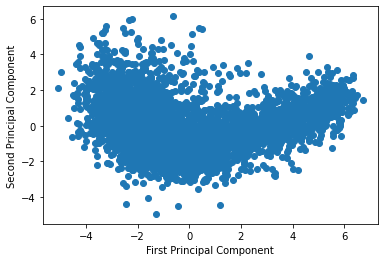

In [146]:
#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

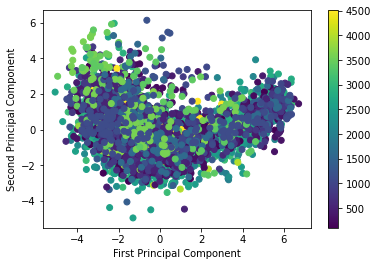

In [241]:
#Visualize the principal components with a color scheme
plt.scatter(x_pca[:,0],x_pca[:,1], c=target)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()

In [253]:
tsne = TSNE(n_components=2)

X_embedded = tsne.fit_transform(df_new_feat)
X_embedded.shape

(3823, 2)

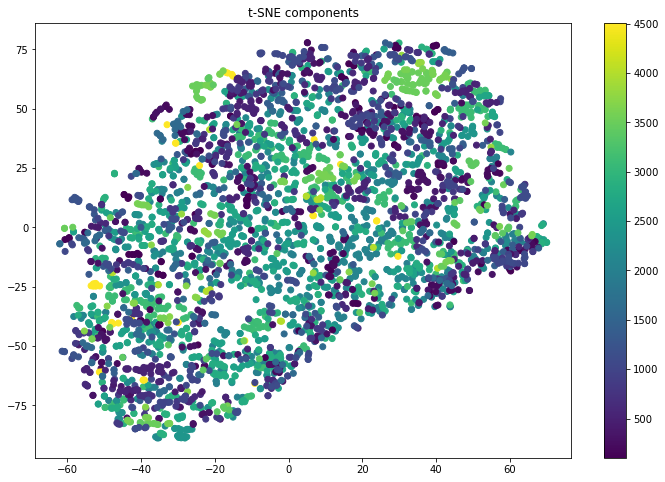

In [255]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = target)
plt.colorbar()

In [148]:
#Investigating at the principal components
pca.components_[1]

array([-0.25507507, -0.20319027, -0.17269391,  0.25266225, -0.16422117,
        0.2767887 , -0.34185462, -0.1696873 ,  0.289025  , -0.32381355,
        0.1878062 , -0.15734113, -0.12368516,  0.08427096, -0.1338633 ,
       -0.17311316, -0.23864864, -0.02132304, -0.1534131 ,  0.1511401 ,
        0.1071987 , -0.04878248, -0.01554967, -0.09845414, -0.11224355,
        0.06795771,  0.21039635,  0.20728799])

In [149]:
pca_2.explained_variance_ratio_

array([0.23992262, 0.07903469])

In [127]:
#trying feature selection RFE
estimator = sklearn.svm.SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)

In [126]:
from sklearn.feature_selection import RFE

In [128]:
selector = selector.fit(scaled_data_frame, target)

In [130]:
ranking = selector.ranking_.reshape(scaled_data_frame[0].shape)

In [131]:
ranking

array([ 5,  1,  7,  1,  1,  1, 14, 12,  1,  3, 15, 10, 17,  8,  1, 16, 13,
        1,  9,  2, 18, 11,  1,  6, 19,  4,  1,  1])

# Part II Fitting a distribution

<AxesSubplot:label='d62203a3-198f-48ac-ba6c-33a582e11304', ylabel='Count'>

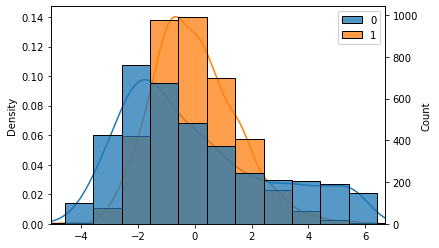

In [173]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=x_pca, ax=ax1)
ax1.set_xlim((x_pca.min(), x_pca.max()))
ax2 = ax1.twinx()
sns.histplot(data=x_pca, discrete=True, ax=ax2)

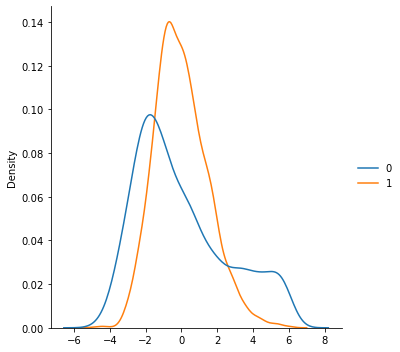

In [338]:
sns.displot(x_pca, kind = "kde")

<AxesSubplot:ylabel='Density'>

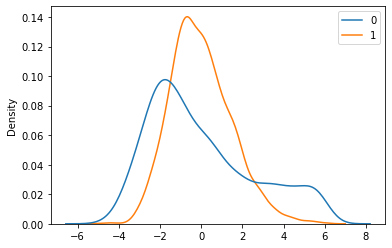

In [331]:
sns.kdeplot(data=x_pca)

<AxesSubplot:ylabel='Count'>

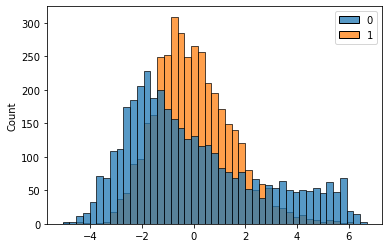

In [333]:
sns.histplot(data=x_pca)

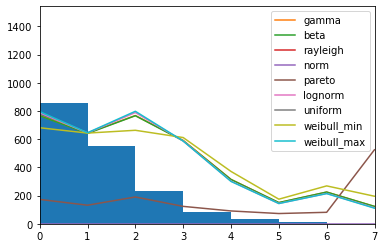

In [330]:
size = len(x_pca)

# creating the histogram
h = plt.hist(x_pca[:,1], bins=range(10))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto', 'lognorm', 'uniform', 'weibull_min', 'weibull_max']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(x_pca)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x_pca[:,0], *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x_pca[:,0], loc=loc, scale=loc) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,7)
plt.legend(loc=0)
plt.show()

In [222]:
from distfit import distfit

In [226]:
dist = distfit(alpha=0.05, smooth=10)

In [227]:
dist.fit_transform(x_pca)

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0164073] [loc=0.000 scale=2.113]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.3298545] [loc=-5.079 scale=5.079]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.6094820] [loc=-6.730 scale=1.651]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0196370] [loc=0.000 scale=1.765]
[distfit] >[t         ] [0.03 sec] [RSS: 0.0111974] [loc=-0.124 scale=1.909]
[distfit] >[genextreme] [0.08 sec] [RSS: 0.0029748] [loc=-0.925 scale=1.760]
[distfit] >[gamma     ] [0.01 sec] [RSS: 0.0026754] [loc=-5.662 scale=0.780]
[distfit] >[lognorm   ] [0.15 sec] [RSS: 0.0029216] [loc=-7.512 scale=7.229]
[distfit] >[beta      ] [0.18 sec] [RSS: 0.0027690] [loc=-5.582 scale=6484.458]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.2146697] [loc=-5.079 scale=11.791]
[distfit] >[loggamma  ] [0.11 sec] [RSS: 0.0173224] [loc=-962.975 scale=119.798]
[distfit] >Compute confidence interval [parametric]


{'model': {'distr': <scipy.stats._continuous_distns.gamma_gen at 0x7fe4db839e20>,
  'stats': 'RSS',
  'params': (7.2545429488303625, -5.661706468589928, 0.7804363131130059),
  'name': 'gamma',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fe2cfba7700>,
  'score': 0.0026754470120042536,
  'loc': -5.661706468589928,
  'scale': 0.7804363131130059,
  'arg': (7.2545429488303625,),
  'CII_min_alpha': -2.9611258286670883,
  'CII_max_alpha': 3.8415071020673786},
 'summary':          distr       score  LLE          loc     scale  \
 0        gamma  0.00267545  NaN     -5.66171  0.780436   
 1         beta  0.00276897  NaN     -5.58175   6484.46   
 2      lognorm  0.00292157  NaN     -7.51171    7.2291   
 3   genextreme  0.00297483  NaN    -0.925278   1.76046   
 4            t   0.0111974  NaN    -0.124373   1.90881   
 5         norm   0.0164073  NaN   1.1895e-16   2.11315   
 6     loggamma   0.0173224  NaN     -962.975   119.798   
 7     dweibull    0.019637  NaN  8.34737e

In [228]:
# Best fitted model
best_distr = dist.model
print(best_distr)

{'distr': <scipy.stats._continuous_distns.gamma_gen object at 0x7fe4db839e20>, 'stats': 'RSS', 'params': (7.2545429488303625, -5.661706468589928, 0.7804363131130059), 'name': 'gamma', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe2cfba7700>, 'score': 0.0026754470120042536, 'loc': -5.661706468589928, 'scale': 0.7804363131130059, 'arg': (7.2545429488303625,), 'CII_min_alpha': -2.9611258286670883, 'CII_max_alpha': 3.8415071020673786}


In [229]:
dist.summary

,distr,score,LLE,loc,scale,arg
0,gamma,0.00267545,NaN,-5.66171,0.780436,"(7.2545429488303625,)"
1,beta,0.00276897,NaN,-5.58175,6484.46,"(6.984158811907998, 8103.447836712862)"
2,lognorm,0.00292157,NaN,-7.51171,7.2291,"(0.2770664283324663,)"
3,genextreme,0.00297483,NaN,-0.925278,1.76046,"(0.0585300755529397,)"
4,t,0.0111974,NaN,-0.124373,1.90881,"(10.420368812295706,)"
5,norm,0.0164073,NaN,1.1895e-16,2.11315,()
6,loggamma,0.0173224,NaN,-962.975,119.798,"(3097.764763859348,)"
7,dweibull,0.019637,NaN,8.34737e-17,1.76488,"(1.2245361699139032,)"
8,uniform,0.21467,NaN,-5.07854,11.7907,()
9,expon,0.329854,NaN,-5.07854,5.07854,()


[distfit] >plot summary..


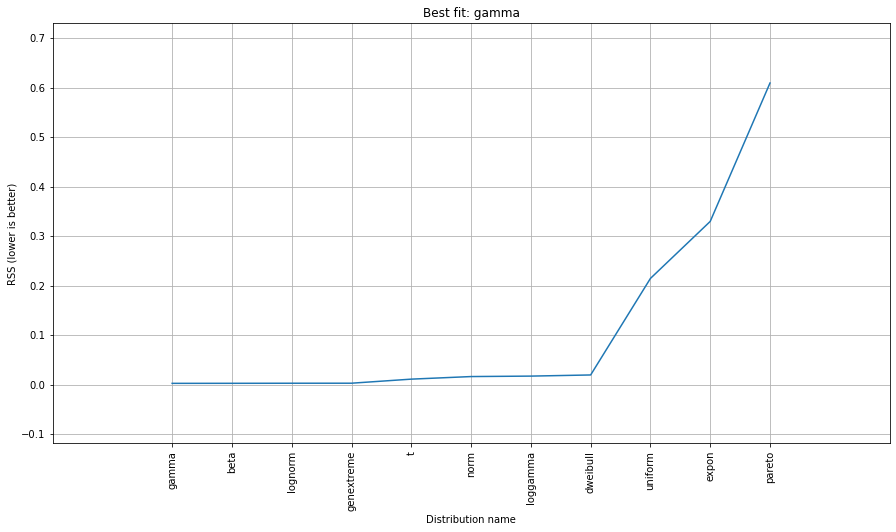

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: gamma'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [230]:
dist.plot_summary()

In [232]:
# Make prediction on new datapoints based on the fit
dist.predict(np.array(target))

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


{'y': array([2010, 2003, 2004, ..., 1110, 1110, 1110]),
 'y_proba': array([0., 0., 0., ..., 0., 0., 0.]),
 'y_pred': array(['up', 'up', 'up', ..., 'up', 'up', 'up'], dtype='<U4'),
 'P': array([0., 0., 0., ..., 0., 0., 0.])}

In [234]:
dist.y_pred

array(['up', 'up', 'up', ..., 'up', 'up', 'up'], dtype='<U4')

In [235]:
dist.y_proba

array([0., 0., 0., ..., 0., 0., 0.])

[distfit] >plot..


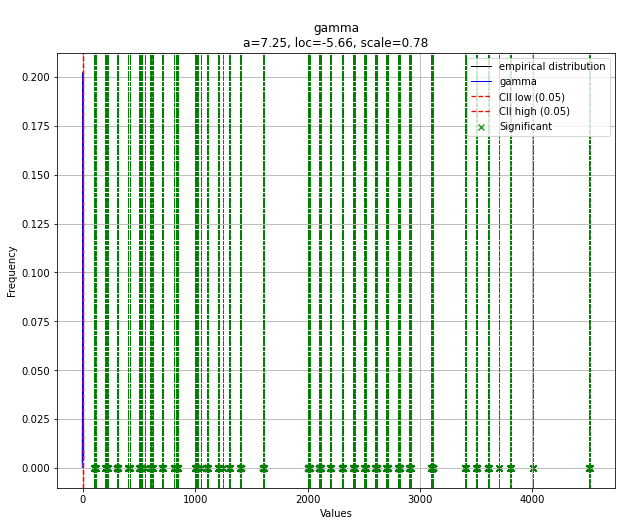

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngamma\na=7.25, loc=-5.66, scale=0.78'}, xlabel='Values', ylabel='Frequency'>)

In [237]:
dist.plot()

<AxesSubplot:ylabel='Density'>

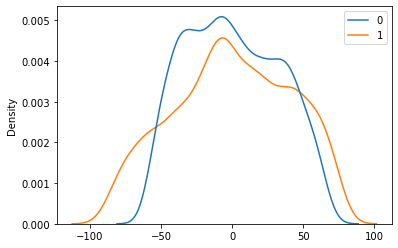

In [339]:
sns.kdeplot(data=X_embedded)